## 1. Linear Regression

In [5]:
%matplotlib inlinea
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import numpy as np

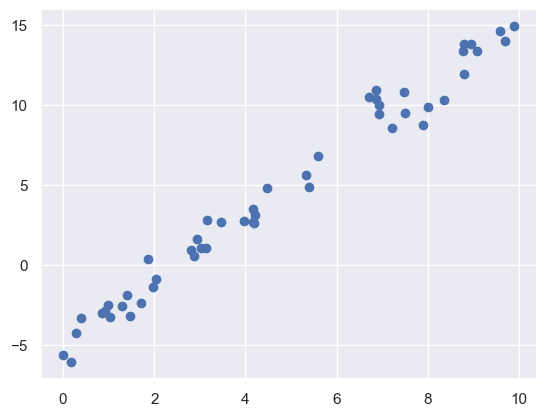

In [7]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x,y);

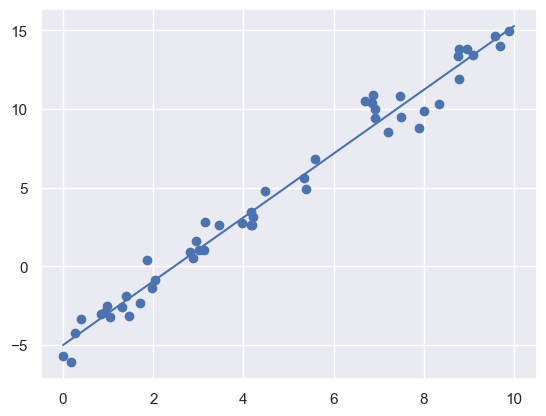

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
# fitting a regression model on x and y
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000) # this is to get x values for which we will predict y
yfit = model.predict(xfit[:,np.newaxis])

plt.scatter(x,y)
plt.plot(xfit, yfit);

In [17]:
print('model slope:', model.coef_[0])
print('model intercept:', model.intercept_)

model slope: 2.027208810360696
model intercept: -4.9985770855532055


## 2. Non Linear Regression

In [19]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2,3,4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:,None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [21]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

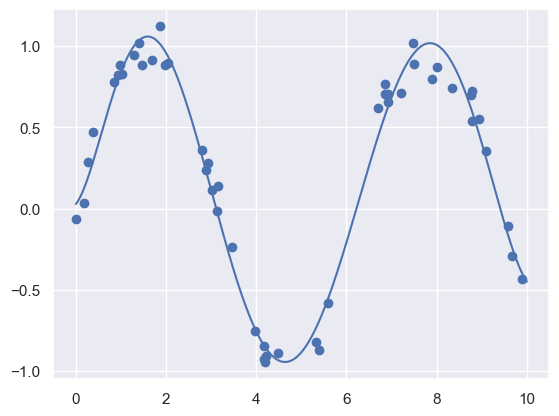

In [24]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis],y)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.scatter(x,y)
plt.plot(xfit,yfit);

### Gaussian basis fucntion

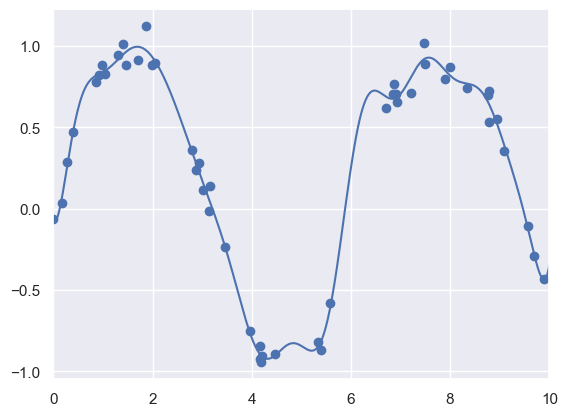

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor

    @staticmethod
    def _gaussian_basis(x, y, width, axis=None):
        arg = (x-y)/width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))

    def fit(self, X, y=None):
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    def transform(self, X):
        return self._gaussian_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)

gauss_model = make_pipeline(GaussianFeatures(20), LinearRegression())
gauss_model.fit(x[:,np.newaxis], y)
yfit=gauss_model.predict(xfit[:,np.newaxis])
plt.scatter(x,y)
plt.plot(xfit, yfit)
plt.xlim(0,10);

## Regularisation

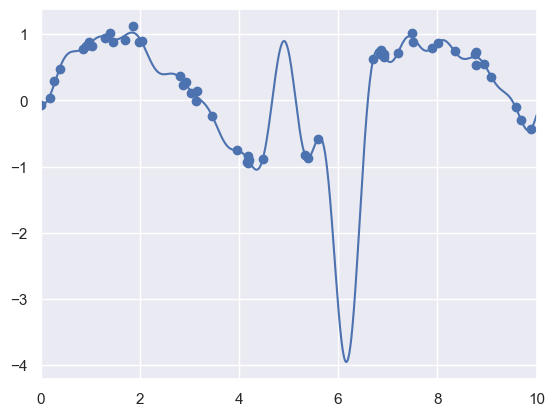

In [28]:
gauss_model = make_pipeline(GaussianFeatures(30), LinearRegression())
gauss_model.fit(x[:,np.newaxis],y)
yfit = gauss_model.predict(xfit[:,np.newaxis])
plt.scatter(x,y)
plt.plot(xfit,yfit)
plt.xlim(0,10);


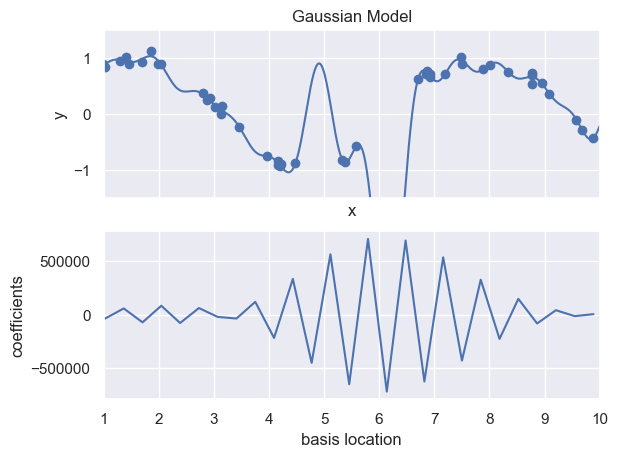

In [31]:
def basis_plot(model, title=None):
    fix, ax = plt.subplots(2, sharex=True)
    model.fit(x[:,np.newaxis],y)
    ax[0].scatter(x,y)
    ax[0].plot(xfit,model.predict(xfit[:,np.newaxis]))
    ax[0].set(xlabel="x",ylabel="y", ylim=(-1.5,1.5))
    if title:
        ax[0].set_title(title)
    ax[1].plot(model.steps[0][1].centers_,model.steps[1][1].coef_)
    ax[1].set(xlabel="basis location", ylabel="coefficients", xlim=(1,10))

basis_plot(gauss_model, title="Gaussian Model")
    

As we can see including more basis Gaussian models the data model starts to overfit the data. Though this will give a very small loss on train data, it may perform really badly on test or future data. We can see the coefficient values of the adjacent basis function blow up and down to cancel each other out (which is just to keep the losses small). To avoid overfitting on the data we have some more regression techniques to avoid overfitting. 

## 3. Ridge Regression

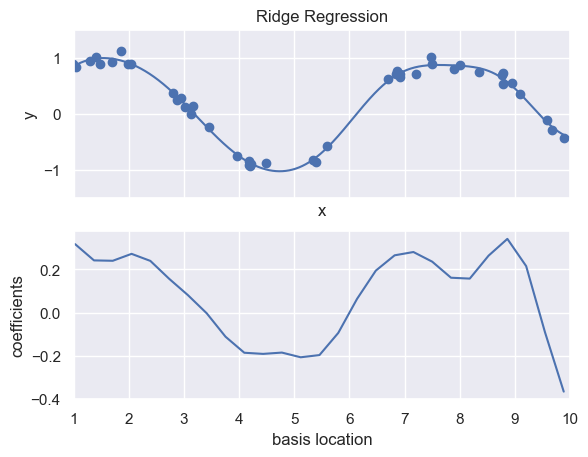

In [32]:
from sklearn.linear_model import Ridge
ridge_model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(ridge_model, title="Ridge Regression")


Here alpha value is the knob controlling the complexity of the model. lower value allows model parameters to change freely where as larger value supresses the parameter values to greater extent. 

## 4. Lasso Regression

/Users/rohitsingh/Documents/projects/virtual-envs/dev/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e-03, tolerance: 2.065e-03
  model = cd_fast.enet_coordinate_descent(


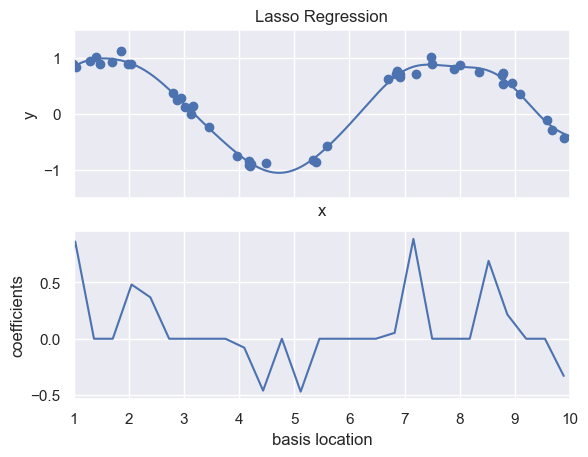

In [38]:
from sklearn.linear_model import Lasso
lasso_model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(lasso_model, title="Lasso Regression")